# **Student Engagement Analysis Model**

This model classifies student's facial expression into *Engaged* or *Not engaged* based on facial features. This in turns helps teachers apy attention to particular students showing signs of boredom or confusion for being at high risk of dropping out compared to students who come of as happy or calm during lessons.

In [17]:
#This notebook serves as the primary record for model creation and evaluation.
# All core pipeline functions are defined in-line to demonstrate the end-to-end
# process as required by the assignment.

# --- Step 0: Setup and Imports ---
import os
import shutil
import kagglehub
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from glob import glob


1. Project directory structure is assumed to be in place.

---
## 1. Data Acquisition and Preprocessing
Clearing old data directories and creating a new project structure...
Project structure created successfully.
Found class directory: /kaggle/input/studentengagement/Student-engagement-dataset/Engaged
Found class directory: /kaggle/input/studentengagement/Student-engagement-dataset/Not engaged

Splitting images and copying to corrected train/test directories...
Training data: 1696 images
Testing data: 424 images
Data successfully processed and split.

Setting up data generators...
Found 733 images belonging to 2 classes.
Found 183 images belonging to 2 classes.
Found 367 images belonging to 2 classes.
Data generators created.
Classes found in training data: ['Engaged', 'Not engaged']

Visualizing Data Distribution...


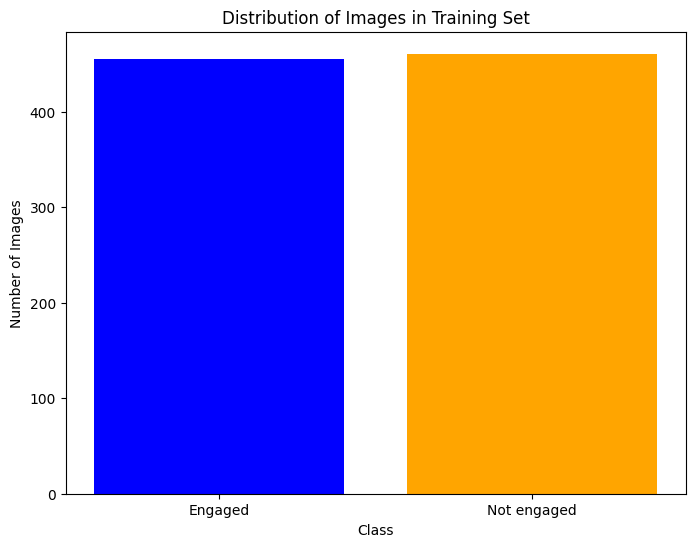


---
## 2. Model Creation and Training
Building the model...
Model summary:


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting the training process...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7592 - loss: 0.5120

23/23 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.7635 - loss: 0.5061 - val_accuracy: 0.9016 - val_loss: 0.3090
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9256 - loss: 0.2222

23/23 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9262 - loss: 0.2207 - val_accuracy: 0.9290 - val_loss: 0.2120
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9744 - loss: 0.1244

23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9746 - loss: 0.1242 - val_accuracy: 0.9617 - val_loss: 0.1523
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9915 - loss: 0.0860 - val_accuracy: 0.9235 - val_loss: 0.1835
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9897 - loss: 0.0649 - val_accuracy: 0.9508 - val_loss: 0.1290
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9968 - loss: 0.0456

23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9968 - loss: 0.0457 - val_accuracy: 0.9672 - val_loss: 0.1113
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9899 - loss: 0.0525 - val_accuracy: 0.9508 - val_loss: 0.1435
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9980 - loss: 0.0367 - val_accuracy: 0.9563 - val_loss: 0.1352
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9925 - loss: 0.0376 - val_accuracy: 0.9508 - val_loss: 0.1351

Visualizing Training and Validation Performance...


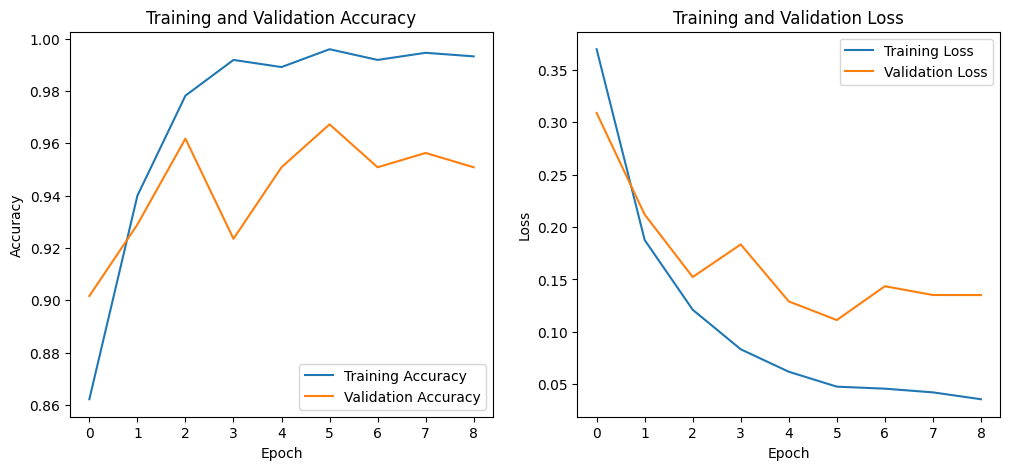


---
## 3. Model Testing


Successfully loaded the best model from: /content/project_name/models/student_engagement_model.h5
Evaluating the model on the test set...
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Test Metrics:
  Accuracy:  0.9673
  Precision: 0.9682
  Recall:    0.9673
  F1 Score:  0.9673

---
## 4. Model Retraining Check
Test accuracy is sufficient. No retraining needed at this time.

---
## 5. Prediction on a Sample Image


Making a prediction on a single image: /content/project_name/data/test/Engaged/0158.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction for sample image '0158.jpg':
  Predicted Label: Engaged
  Confidence: 0.9929


In [18]:

# Define global project paths
PROJECT_ROOT = "/content/project_name"
NOTEBOOK_PATH = os.path.join(PROJECT_ROOT, "notebook")
SRC_PATH = os.path.join(PROJECT_ROOT, "src")
DATA_PATH = os.path.join(PROJECT_ROOT, "data")
MODELS_PATH = os.path.join(PROJECT_ROOT, "models")

# Define file paths to ensure consistency
MODEL_FILENAME = "student_engagement_model.h5"
FINAL_MODEL_PATH = os.path.join(MODELS_PATH, MODEL_FILENAME)

#  Directory structure has already been created
# in the terminal as a one-time setup step.
# We will just print a message to confirm.
print("1. Project directory structure is assumed to be in place.")

# --- Step 1: Data Acquisition and Preprocessing ---
print("\n---")
print("## 1. Data Acquisition and Preprocessing")

# All data processing logic is now in the notebook
KAGGLE_DATASET_NAME = "joyee19/studentengagement"
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 2  # This must be 2 for binary classification
EPOCHS = 10
LEARNING_RATE = 0.0001

def download_and_preprocess_data():
    """
    Downloads the dataset from Kaggle and then preprocesses it, splitting
    images into labeled train/test directories. This version is more robust
    to inconsistent capitalization in the source data and guarantees a clean
    slate by clearing existing data directories first.
    """
    print("Clearing old data directories and creating a new project structure...")
    if os.path.exists(DATA_PATH):
        shutil.rmtree(DATA_PATH)

    os.makedirs(os.path.join(DATA_PATH, 'train', 'Engaged'), exist_ok=True)
    os.makedirs(os.path.join(DATA_PATH, 'train', 'Not engaged'), exist_ok=True)
    os.makedirs(os.path.join(DATA_PATH, 'test', 'Engaged'), exist_ok=True)
    os.makedirs(os.path.join(DATA_PATH, 'test', 'Not engaged'), exist_ok=True)
    os.makedirs(MODELS_PATH, exist_ok=True)
    print("Project structure created successfully.")

    print("Downloading dataset from Kaggle...")
    download_path = kagglehub.dataset_download(KAGGLE_DATASET_NAME)
    base_data_path = os.path.join(download_path, 'Student-engagement-dataset')

    raw_engaged_images = []
    raw_not_engaged_images = []

    # Iterate through subdirectories to find images, regardless of capitalization
    for class_name in ['Engaged', 'Not Engaged', 'Not engaged']:
        path_to_check = os.path.join(base_data_path, class_name)
        if os.path.exists(path_to_check):
            print(f"Found class directory: {path_to_check}")
            images = glob(os.path.join(path_to_check, '**', '*.jpg'), recursive=True) + \
                     glob(os.path.join(path_to_check, '**', '*.jpeg'), recursive=True) + \
                     glob(os.path.join(path_to_check, '**', '*.png'), recursive=True)
            if class_name.lower() == 'engaged':
                raw_engaged_images.extend(images)
            else:
                raw_not_engaged_images.extend(images)

    all_images = raw_engaged_images + raw_not_engaged_images
    labels = [0] * len(raw_engaged_images) + [1] * len(raw_not_engaged_images)

    train_images, test_images, train_labels, test_labels = train_test_split(
        all_images, labels, test_size=0.2, random_state=42, stratify=labels)

    print("\nSplitting images and copying to corrected train/test directories...")
    for img_path, label in zip(train_images, train_labels):
        dest_dir = os.path.join(DATA_PATH, 'train', 'Engaged' if label == 0 else 'Not engaged')
        shutil.copy(img_path, dest_dir)

    for img_path, label in zip(test_images, test_labels):
        dest_dir = os.path.join(DATA_PATH, 'test', 'Engaged' if label == 0 else 'Not engaged')
        shutil.copy(img_path, dest_dir)

    print(f"Training data: {len(train_images)} images")
    print(f"Testing data: {len(test_images)} images")
    print("Data successfully processed and split.")


def get_data_generators(train_path, test_path):
    """Creates and returns data generators for training and testing."""
    print("\nSetting up data generators...")
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )
    val_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )
    print("Data generators created.")

    # Print the class names found to confirm the fix
    print(f"Classes found in training data: {list(train_generator.class_indices.keys())}")

    return train_generator, val_generator, test_generator

# Initialize generators and metrics
train_gen, val_gen, test_gen = None, None, None
test_accuracy = 0.0

try:
    download_and_preprocess_data()
    train_gen, val_gen, test_gen = get_data_generators(
        os.path.join(DATA_PATH, 'train'),
        os.path.join(DATA_PATH, 'test')
    )

    # --- Visualization: Data Distribution ---
    print("\nVisualizing Data Distribution...")

    class_labels = list(train_gen.class_indices.keys())
    train_counts = [len(os.listdir(os.path.join(DATA_PATH, 'train', label))) for label in class_labels]

    plt.figure(figsize=(8, 6))
    plt.bar(class_labels, train_counts, color=['blue', 'orange'])
    plt.title('Distribution of Images in Training Set')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()

except Exception as e:
    print(f"Error during data preprocessing: {e}")


# --- Step 2: Model Creation and Training ---
print("\n---")
print("## 2. Model Creation and Training")

def create_model():
    """Creates a new model using transfer learning (MobileNetV2)."""
    print("Building the model...")
    base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                             include_top=False,
                             weights='imagenet')

    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)

    # Ensure the final layer matches the number of classes (2)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print("Model summary:")
    model.summary()
    return model


def train_model(model, train_gen, val_gen):
    """Trains the provided model with regularization and early stopping."""
    print("\nStarting the training process...")

    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    checkpoint_filepath = os.path.join(MODELS_PATH, MODEL_FILENAME)
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

    history = model.fit(
        train_gen,
        epochs=EPOCHS,
        validation_data=val_gen,
        callbacks=[early_stopping_callback, model_checkpoint_callback],
        verbose=1
    )
    return history

try:
    if train_gen and val_gen:
        engagement_model = create_model()
        history = train_model(engagement_model, train_gen, val_gen)

        # --- Visualization: Training History ---
        print("\nVisualizing Training and Validation Performance...")

        # Plot accuracy
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
    else:
        print("Data generators not available. Skipping model creation and training.")

except Exception as e:
    print(f"Error during model creation and training: {e}")


# --- Step 3: Model Testing ---
print("\n---")
print("## 3. Model Testing")

def test_model(model, test_gen):
    """Evaluates the trained model on the test dataset and calculates multiple metrics."""
    print("Evaluating the model on the test set...")

    test_gen.reset()
    y_true = test_gen.classes

    y_pred_probs = model.predict(test_gen, verbose=1)
    y_pred = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Test Metrics:")
    print(f"  Accuracy:  {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1 Score:  {metrics['f1_score']:.4f}")

    return metrics

try:
    if os.path.exists(FINAL_MODEL_PATH) and test_gen:
        final_model = tf.keras.models.load_model(FINAL_MODEL_PATH)
        print(f"Successfully loaded the best model from: {FINAL_MODEL_PATH}")

        metrics = test_model(final_model, test_gen)
        test_accuracy = metrics['accuracy']
    else:
        print(f"Error: Model file not found at {FINAL_MODEL_PATH} or test generator is not available. Cannot proceed with testing.")
        test_accuracy = 0.0
except Exception as e:
    print(f"Error during model testing: {e}")
    test_accuracy = 0.0


# --- Step 4: Model Retraining Check & Execution ---
print("\n---")
print("## 4. Model Retraining Check")

def retrain_model(model_path, new_train_gen, new_val_gen, new_epochs=5):
    """Function to retrain an existing model with new data or for more epochs."""
    print("Retraining the model...")

    if not os.path.exists(model_path):
        print(f"Error: Model not found at {model_path}. Cannot retrain.")
        return None

    model = tf.keras.models.load_model(model_path)
    base_model = model.layers[0]
    base_model.trainable = True

    fine_tune_at = 100
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE / 10),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(
        new_train_gen,
        epochs=new_epochs,
        validation_data=new_val_gen,
        verbose=1
    )
    print("\nModel retraining complete.")

    retrained_model_path = os.path.join(MODELS_PATH, 'student_engagement_retrained.h5')
    model.save(retrained_model_path)
    print(f"Retrained model saved to {retrained_model_path}")

    return model

if test_accuracy < 0.85:
    print("Test accuracy is below the 85% threshold. Triggering model retraining...")
    try:
        retrain_model(FINAL_MODEL_PATH, train_gen, val_gen, new_epochs=5)
    except Exception as e:
        print(f"Error during model retraining: {e}")
else:
    print("Test accuracy is sufficient. No retraining needed at this time.")


# --- Step 5: Prediction on a Sample Image ---
print("\n---")
print("## 5. Prediction on a Sample Image")

def predict_single_image(model, image_path):
    """
    Predicts the class of a single image.
    This function is now defined in-line for a fully self-contained notebook.
    """
    print(f"Making a prediction on a single image: {image_path}")

    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # CRITICAL FIX: The model was trained on scaled data, so we must also scale
    # the single image before making a prediction.
    img_array = img_array / 255.0
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    class_labels = {0: 'Engaged', 1: 'Not engaged'}
    predicted_label = class_labels[predicted_class_index]

    return predicted_label, confidence, predicted_class_index

try:
    test_image_dir = os.path.join(DATA_PATH, 'test', 'Engaged')
    if os.path.exists(test_image_dir) and 'test_gen' in locals() and len(os.listdir(test_image_dir)) > 0:
        sample_image_path = os.path.join(test_image_dir, os.listdir(test_image_dir)[0])

        final_model_for_pred = tf.keras.models.load_model(FINAL_MODEL_PATH)

        # Use the new in-line function for prediction
        predicted_label, confidence, _ = predict_single_image(final_model_for_pred, sample_image_path)

        print(f"Prediction for sample image '{os.path.basename(sample_image_path)}':")
        print(f"  Predicted Label: {predicted_label}")
        print(f"  Confidence: {confidence:.4f}")
    else:
        print("Test image directory not found or test generator not available. Cannot perform sample prediction.")
except Exception as e:
    print(f"Error during sample prediction: {e}")
